In [1]:
from alpaca import ALPcouplings
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics.functions import nsigmas
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})

# $c_V$ and $c_A$ 

In [ ]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'K+ -> pi+ a'
    #'KL -> pi0 a'
]

## Universal couplings

### $m_a=0.1$ GeV

In [ ]:
ma = 0.1
fa = 1e3
csb_vec_pos = np.logspace(-4, 0, 100)
csb_axi_pos = np.logspace(-4, 0, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    coupling = ALPcouplings({'cqL': (cvec_val -  caxi_val)/2, 'cuR': (cvec_val +  caxi_val)/2, 'cdR': (cvec_val +  caxi_val)/2}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [ ]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

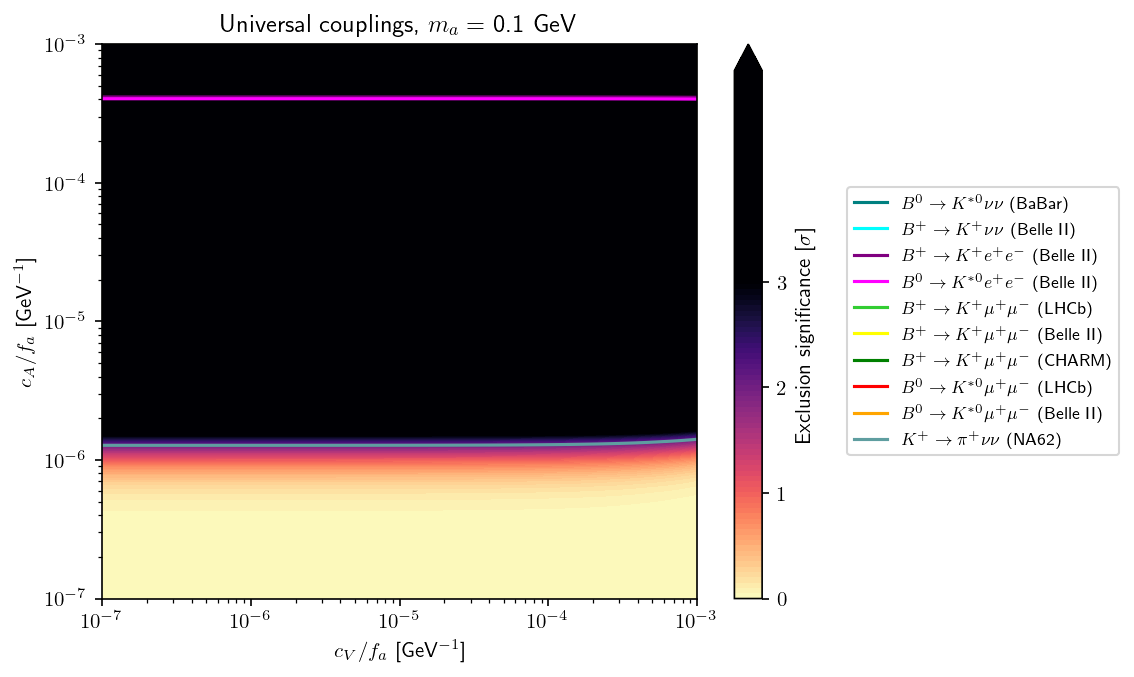

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'cadetblue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'Universal couplings, $m_a=$ {ma} GeV')#'$B \to K a$, u
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)


### $m_a =0.3$ GeV

In [ ]:
ma = 0.3
fa = 1e3
csb_vec_pos = np.logspace(-4, 2, 100)
csb_axi_pos = np.logspace(-4, 2, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    coupling = ALPcouplings({'cqL': (cvec_val -  caxi_val)/2, 'cuR': (cvec_val +  caxi_val)/2, 'cdR': (cvec_val +  caxi_val)/2}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [ ]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

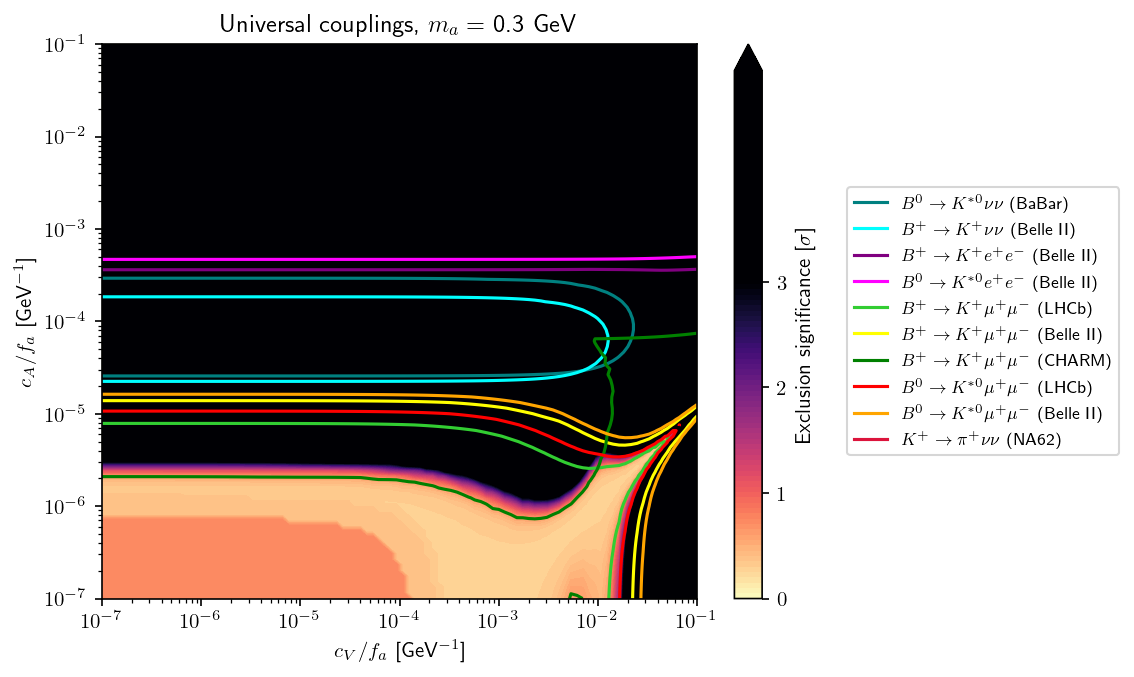

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'Universal couplings, $m_a=$ {ma} GeV')#'$B \to K a$, u
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)


### $m_a=2$ GeV

In [ ]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-6, 0, 100)
csb_axi_pos = np.logspace(-6, 0, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    coupling = ALPcouplings({'cqL': (cvec_val -  caxi_val)/2, 'cuR': (cvec_val +  caxi_val)/2, 'cdR': (cvec_val +  caxi_val)/2}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [ ]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

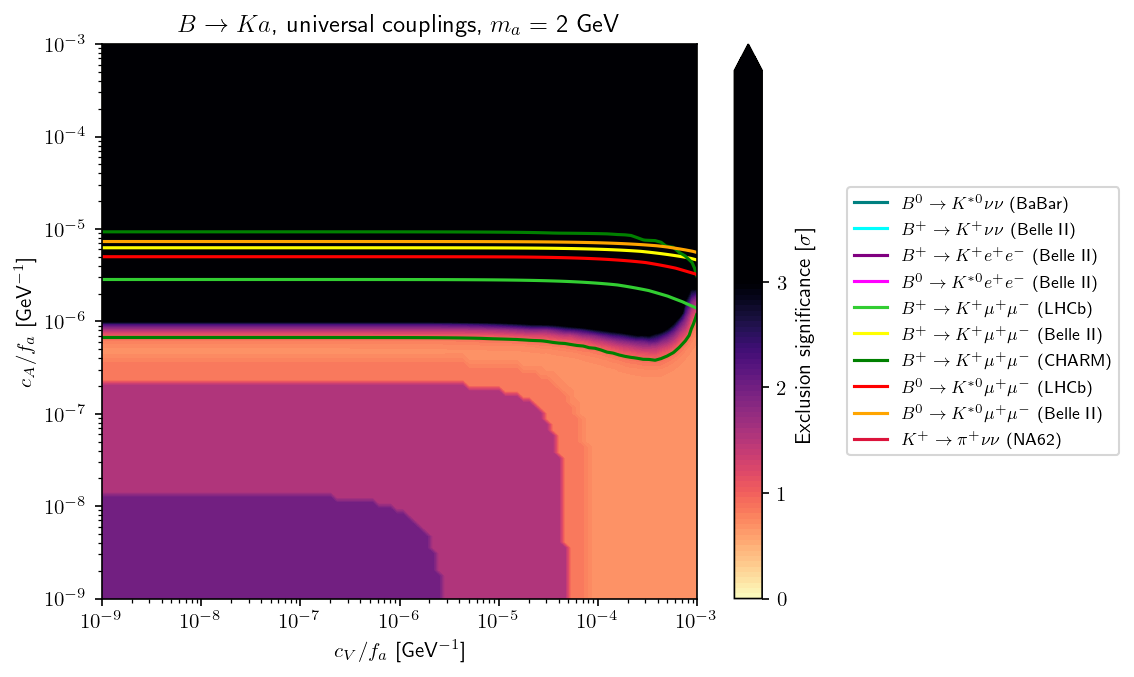

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, universal couplings, $m_a=$ {ma} GeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)


## $C_{sb}$ coupling

In [ ]:
ma = 2
fa = 1e3

csb_vec_pos = np.logspace(-8, -3, 100)
csb_axi_pos = np.logspace(-8, -3, 100)

cvec_pos, caxi_pos = np.meshgrid(csb_vec_pos, csb_axi_pos)

# Flatten the meshgrid arrays
cvec_flat = cvec_pos.flatten()
caxi_flat = caxi_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cvec_val, caxi_val in zip(cvec_flat, caxi_flat):
    coupling = ALPcouplings({'cqL': np.array([[0, 0, 0], [0, 0, (cvec_val -  caxi_val)/2], [0, 0, 0]]), 'cuR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]]), 'cdR': np.array([[0, 0, 0], [0, 0, (cvec_val +  caxi_val)/2], [0, 0, 0]])}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cvec_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_vec_pos.shape, fa)
ma_grid = np.full(csb_vec_pos.shape, ma)

In [ ]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

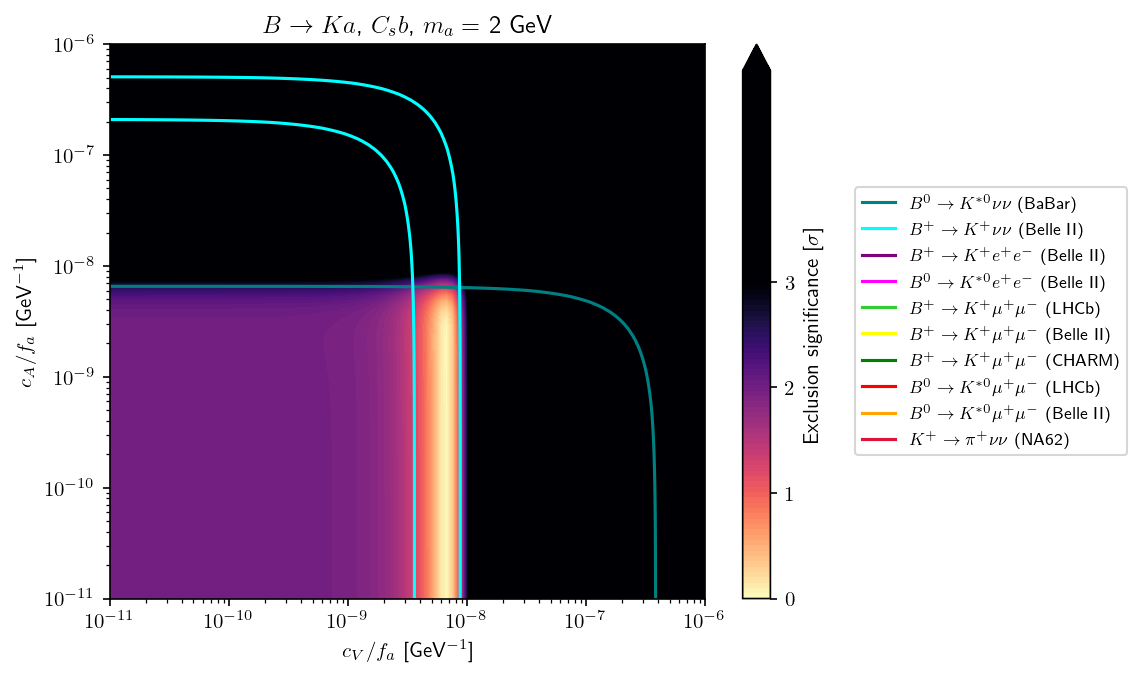

In [ ]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'crimson'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cvec_pos/fa, caxi_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_V/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_A/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'$B \to K a$, $C_sb$, $m_a=$ {ma} GeV')
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

# $c_L$ and $c_R$ 

In [152]:
transitions = [
    'B0 -> K*0 a',
    'B+ -> K+ a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'K+ -> pi+ a'
    #'KL -> pi0 a'
]

## Universal couplings

### $m_a=0.1$ GeV

In [153]:
ma = 0.1
fa = 1e3
csb_left_pos = np.logspace(-4, 0, 100)
csb_right_pos = np.logspace(-4, 0, 100)

cr_pos, cl_pos = np.meshgrid(csb_right_pos, csb_left_pos)

# Flatten the meshgrid arrays
cr_flat = cr_pos.flatten()
cl_flat = cl_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cr_val, cl_val in zip(cr_flat, cl_flat):
    coupling = ALPcouplings({'cqL': cl_val, 'cuR': cr_val, 'cdR': cr_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cr_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_right_pos.shape, fa)
ma_grid = np.full(csb_right_pos.shape, ma)

In [154]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

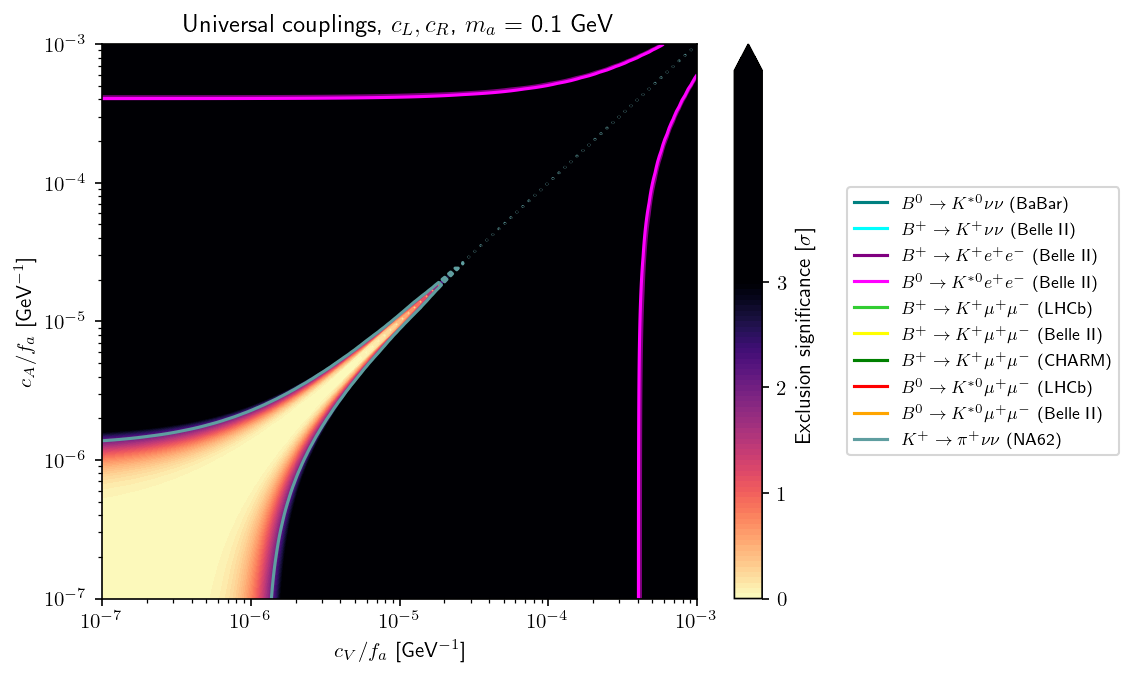

In [157]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'cadetblue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_R/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_L/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'Universal couplings, $c_L, c_R$, $m_a=$ {ma} GeV')#'$B \to K a$, u
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

### $m_a =0.3$ GeV

In [158]:
ma = 0.3
fa = 1e3
csb_left_pos = np.logspace(-4, 0, 100)
csb_right_pos = np.logspace(-4, 0, 100)

cr_pos, cl_pos = np.meshgrid(csb_right_pos, csb_left_pos)

# Flatten the meshgrid arrays
cr_flat = cr_pos.flatten()
cl_flat = cl_pos.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cr_val, cl_val in zip(cr_flat, cl_flat):
    coupling = ALPcouplings({'cqL': cl_val, 'cuR': cr_val, 'cdR': cr_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cr_pos.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_right_pos.shape, fa)
ma_grid = np.full(csb_right_pos.shape, ma)

In [159]:
chi2 = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')

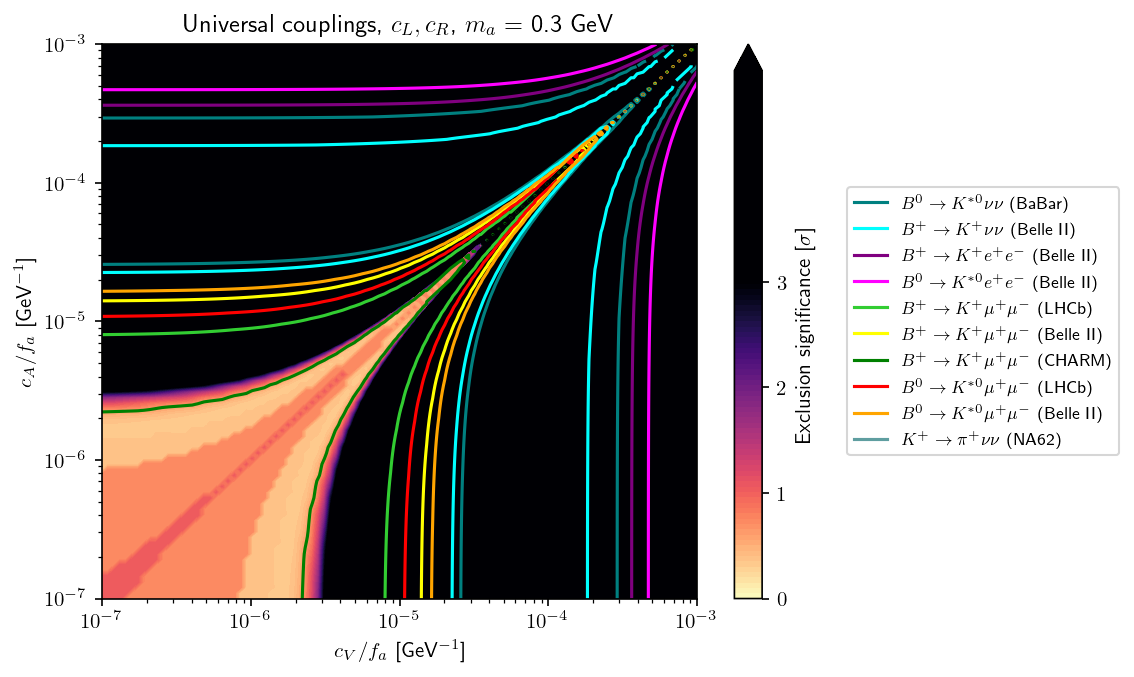

In [160]:
plt.figure(dpi=150)
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'cadetblue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl= plt.contourf(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2[('', 'Global')]),2), levels=list(np.linspace(0, 5, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2.items():
    if observable == ('', 'Global'):
        break
    plt.contour(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cb = plt.colorbar(pl, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.xlabel(r'$c_R/f_a$ [GeV$^{-1}$]')
plt.ylabel(r'$c_L/f_a$ [GeV$^{-1}$]')
#plt.xlim(0.1, 5)
plt.title(rf'Universal couplings, $c_L, c_R$, $m_a=$ {ma} GeV')#'$B \to K a$, u
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)

### $m_a=2$ GeV

In [164]:
ma = 2
fa = 1e3

csb_left_pos = np.logspace(-6, 0, 100)
csb_right_pos = np.logspace(-6, 0, 100)
cr_pos, cl_pos = np.meshgrid(csb_right_pos, csb_left_pos)

csb_left_neg = np.logspace(-6, 0, 100)
csb_right_neg = -np.logspace(-6, 0, 100)
cr_neg, cl_neg = np.meshgrid(csb_right_neg, csb_left_neg)

# Flatten the meshgrid arrays
cr_flat = cr_pos.flatten()
cl_flat = cl_pos.flatten()

cr_flat_neg = cr_neg.flatten()
cl_flat_neg = cl_neg.flatten()

# Create a list to store the ALPcouplings objects
couplings_list = []
couplings_list_neg = []


# Iterate over the flattened arrays and create ALPcouplings objects
for cr_val, cl_val in zip(cr_flat, cl_flat):
    coupling = ALPcouplings({'cqL': cl_val, 'cuR': cr_val, 'cdR': cr_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

for cr_val, cl_val in zip(cr_flat_neg, cl_flat_neg):
    coupling = ALPcouplings({'cqL': cl_val, 'cuR': cr_val, 'cdR': cr_val}, scale=fa, basis='derivative_above').match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list_neg.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_array_pos = np.array(couplings_list).reshape(cr_pos.shape)
couplings_array_neg = np.array(couplings_list_neg).reshape(cr_neg.shape)

# Create fa_grid and ma_grid with the same shape as the meshgrid
fa_grid = np.full(csb_right_pos.shape, fa)
ma_grid = np.full(csb_right_pos.shape, ma)

In [165]:
chi2_pos = get_chi2(transitions, ma, couplings_array_pos, fa, integrator='leadinglog')
chi2_neg = get_chi2(transitions, ma, couplings_array_neg, fa, integrator='leadinglog')


Text(0.5, 1.0, '$m_a = 2$ GeV, $f_a = 1$ TeV')

<Figure size 960x720 with 0 Axes>

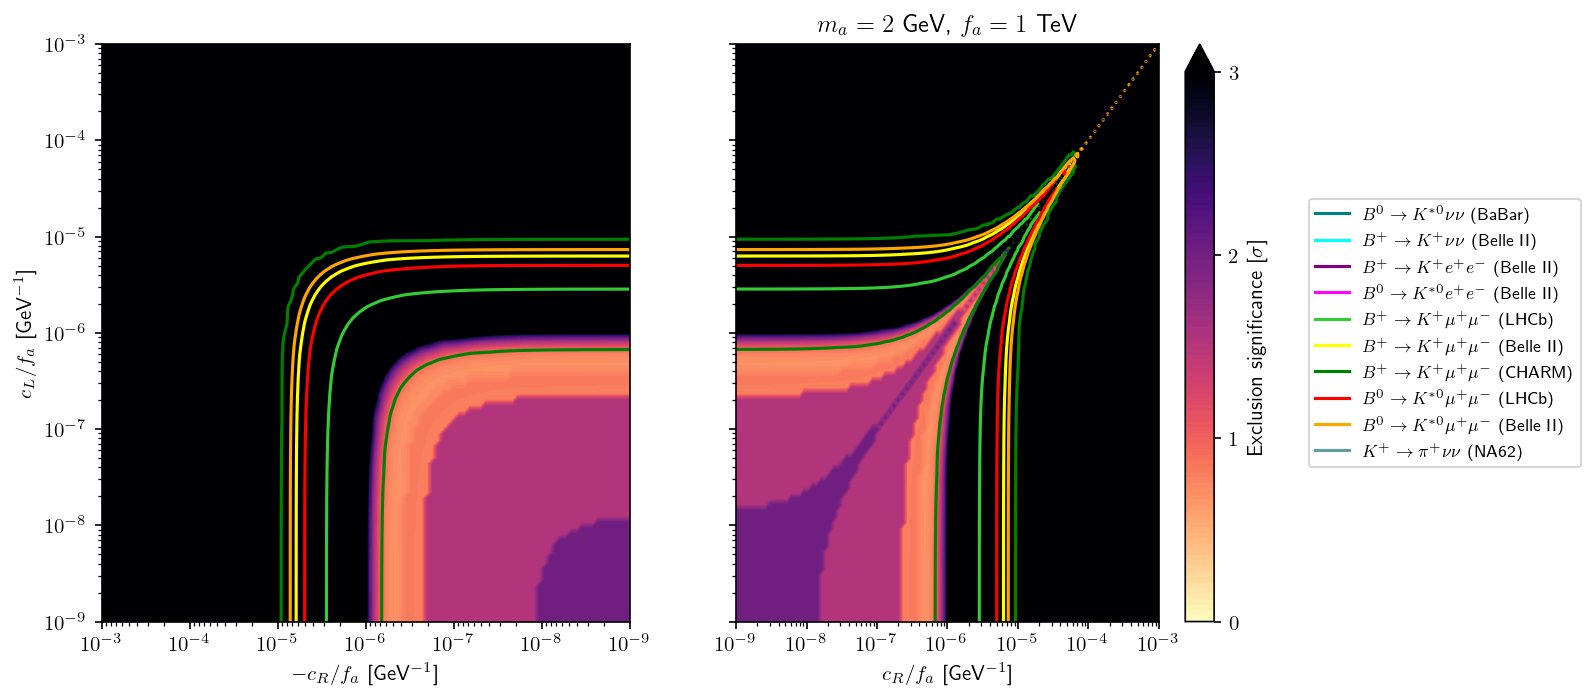

In [168]:
plt.figure(dpi=150)
fig, ax = plt.subplots(1,2,dpi=150, sharey=True, figsize=(10,5))
colors = {('B+ -> K+ a', 'Belle II'): 'cyan', ('B0 -> K*0 a', 'BaBar'): 'teal', ('B+ -> K+ e e', 'Belle II'): 'purple', ('B0 -> K*0 e e', 'Belle II'): 'magenta', ('B+ -> K+ mu mu', 'LHCb'): 'limegreen', ('B+ -> K+ mu mu', 'Belle II'): 'yellow', ('B+ -> K+ mu mu', 'CHARM'): 'green', ('B0 -> K*0 mu mu', 'LHCb'): 'red', ('B0 -> K*0 mu mu', 'Belle II'): 'orange', ('B+ -> K+ gamma gamma', 'BaBar'): 'blue', ('K+ -> pi+ a', 'NA62'): 'cadetblue'}
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'K+ -> pi+ a': r'$K^+ \to \pi^+ \nu \nu$'}
legend_elements = []

pl_pos = ax[1].contourf(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2_pos[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_pos.items():
    if observable == ('', 'Global'):
        break
    ax[1].contour(cr_pos/fa, cl_pos/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

pl_neg = ax[0].contourf(-cr_neg/fa, cl_neg/fa, nsigmas(np.real(chi2_neg[('', 'Global')]),2), levels=list(np.linspace(0, 3, 100)), cmap='magma_r', vmax=3, extend='max')
for observable, chi2_obs in chi2_neg.items():
    if observable == ('', 'Global'):
        break
    ax[0].contour(-cr_neg/fa, cl_neg/fa, nsigmas(np.real(chi2_obs), 2), levels=[2], colors = colors[observable])
    # legend_elements.append(plt.Line2D([0], [0], color=colors[observable], label=tex[observable[0]] + ' (' + observable[1] + ')'))

for i in ax:
    i.set_xscale('log')
    i.set_yscale('log')

ax[0].invert_xaxis()

ax[0].set_xlabel(r'$-c_R/f_a$ [GeV$^{-1}$]')
ax[1].set_xlabel(r'$c_R/f_a$ [GeV$^{-1}$]')
ax[0].set_ylabel(r'$c_L/f_a$ [GeV$^{-1}$]')
cb = plt.colorbar(pl_pos, extend='max')
cb.set_label(r'Exclusion significance [$\sigma$]')
cb.set_ticks([0, 1, 2, 3])
plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=9, fontsize=8)
plt.title(rf'$m_a = {ma}$ GeV, $f_a = 1$ TeV')